#Reading a netcdf file

1.  Fetch the netcdf file tropical.nc from my webserver (50 Mbytes)

In [16]:
import urllib.request
urllib.request.urlretrieve("http://clouds.eos.ubc.ca/~phil/docs/atsc500/tropical_subset.nc", 
                           "tropical_subset.nc")

('tropical_subset.nc', <http.client.HTTPMessage at 0x115595940>)

2.  Identify the file structure using ncdump

In [10]:
!ncdump -h tropical_subset.nc

netcdf tropical_subset {
dimensions:
	x = 100 ;
	y = 110 ;
	z = UNLIMITED ; // (112 currently)
	time = UNLIMITED ; // (1 currently)
variables:
	float x(x) ;
		string x:units = "m" ;
	float y(y) ;
		string y:units = "m" ;
	float z(z) ;
		string z:units = "m" ;
		string z:long_name = "height" ;
	float time(time) ;
		string time:units = "d" ;
		string time:long_name = "time" ;
	float p(z) ;
		string p:units = "mb" ;
		string p:long_name = "pressure" ;
	float U(time, z, y, x) ;
		string U:long_name = "X Wind Component" ;
		string U:units = "m/s" ;
	float V(time, z, y, x) ;
		string V:long_name = "Y Wind Component" ;
		string V:units = "m/s" ;
	float W(time, z, y, x) ;
		string W:long_name = "Z Wind Component" ;
		string W:units = "m/s" ;
	float PP(time, z, y, x) ;
		string PP:long_name = "Pressure Perturbation" ;
		string PP:units = "Pa" ;
	float TABS(time, z, y, x) ;
		string TABS:long_name = "Absolute Temperature" ;
		string TABS:units = "K" ;
	float QV(time, z, y, x) ;
		string QV:long_

3.  Read a variable using the netCDF4 module:  http://unidata.github.io/netcdf4-python/

In [24]:
from netCDF4 import Dataset
#
# the variables attribute returns a dictionary of variables
#
with Dataset('tropical_subset.nc','r') as nc_in:
    print(list(nc_in.variables.keys()))
    the_temp=nc_in.variables['TABS'][...]
    print(the_temp.shape)
    #
    # remove the time dimension, since we only have one timestep
    #
    the_temp=the_temp.squeeze()
    print(the_temp.shape)
    the_height=nc_in.variables['z'][...]
    print(the_height.shape)

['x', 'y', 'z', 'time', 'p', 'U', 'V', 'W', 'PP', 'TABS', 'QV', 'QN', 'QP']
(1, 112, 110, 100)
(112, 110, 100)
(112,)


#Plotting three temperature profiles

[<matplotlib.text.Text at 0x1167356a0>, <matplotlib.text.Text at 0x1168fdb38>]

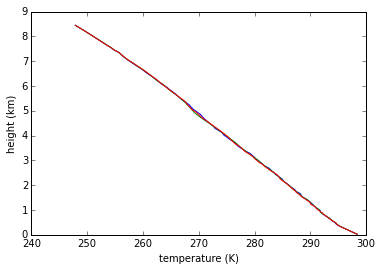

In [32]:
%matplotlib inline
#
# plot 3 arbitrary columns
#
from matplotlib import pyplot as plt
meter2km=1.e-3
random_xy=[(10,20),(80,40),(25,75)]
fig,ax=plt.subplots(1,1)
for x,y in random_xy:
    temp_profile=the_temp[:,x,y]
    ax.plot(temp_profile,the_height*meter2km)  
ax.set(xlabel='temperature (K)',ylabel='height (km)',title='3 profiles')

# Calculate the horizontal average temperature

In [34]:
print(the_temp.shape)
xmean=the_temp.mean(axis=2)
print(xmean.shape)
xymean=xmean.mean(axis=1)
print(xymean.shape)

(112, 110, 100)
(112, 110)
(112,)


#Calculate the temperature pertubation

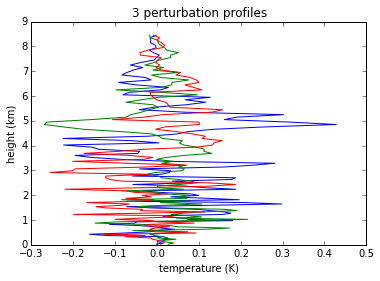

In [36]:
fig,ax=plt.subplots(1,1)
for x,y in random_xy:
    temp_profile=the_temp[:,x,y] - xymean
    ax.plot(temp_profile,the_height*meter2km)  
ax.set(xlabel='temperature (K)',ylabel='height (km)',title='3 perturbation profiles')

#Assignment for Wednesday, Sept. 16: 11am

1.  Write a function that takes TABS and p and returns $\theta$, the potential temperature

1.  Make a plot of the vertical profile of $\overline{w^\prime \theta^\prime}$ vs. z for
    this model timestep

1.  Upload your version of this notebook to the cloud (Dropbox, googledrive etc.) and
    email me a link

#Getting started with vapor

1. Install vapor per [these instructions](https://www.vapor.ucar.edu/docs/usage/getting-started-vapor)
1. Download and unzip the following file:

In [38]:
urllib.request.urlretrieve("http://clouds.eos.ubc.ca/~phil/docs/atsc500/tropical.zip", 
                           "tropical.zip")

('tropical.zip', <http.client.HTTPMessage at 0x111eec908>)

Start vapor, go to "Data -> Load dataset into current session" and see if you get a
3-d visualization of TABS